### Install dependencies

In [2]:
!pip install boto3 sagemaker

Defaulting to user installation because normal site-packages is not writeable


### Setup

1. Create a new endpoint at https://us-east-2.console.aws.amazon.com/sagemaker/home?region=us-east-2#/endpoints then set `ENDPOINT` to it's name.
2. You can do inference in a single file or in a entire folder, set the path to it using `INPUT_PATH`

In [1]:
ENDPOINT = "your_endpoint_name"

# local file or folder
INPUT_PATH = "./examples/anthoropos/"
# INPUT_PATH = "./drones.jpg"

### Run inference

Now that we have set the paths, we will run the images thuru amazon sagemaker's endpoint.

Note: This assumes you have created the endpoint and a IAM access been configured.

In [3]:
import os
import glob
import json
import boto3
import sagemaker

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)
    
# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))

    # sagemaker request raw response
    # print('sagemaker response:\n\n', result, '\n')

    # inference response
    print('file: {} inference response:\n{}\n'.format(
        fpath,
        json.dumps(json.loads(result['Body'].read().decode()), sort_keys=True, indent=4))
    )

Processing: 13 files...
file: ./examples/anthoropos/mall_8.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.972399115562439,
                "det_bbox": [
                    0.8891903162002563,
                    0.8580945134162903,
                    0.9244086146354675,
                    1.0
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.9622098207473755,
                "det_bbox": [
                    0.11435450613498688,
                    0.8574514985084534,
                    0.13858865201473236,
                    0.9537476301193237
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.9549175500869751,
                "det_b

file: ./examples/anthoropos/difficult_subway_2.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.9977142810821533,
                "det_bbox": [
                    0.698714017868042,
                    0.4055069088935852,
                    0.7278807759284973,
                    0.5516822338104248
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.9954341053962708,
                "det_bbox": [
                    0.3734517991542816,
                    0.4866422116756439,
                    0.403684139251709,
                    0.6262089014053345
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.995081901550293,
                "det_bb

file: ./examples/anthoropos/mall_3.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.982174813747406,
                "det_bbox": [
                    0.07390868663787842,
                    0.484928697347641,
                    0.10440980643033981,
                    0.6240171194076538
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.8718428015708923,
                "det_bbox": [
                    0.05818760395050049,
                    0.4903150200843811,
                    0.0877646654844284,
                    0.6230437755584717
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.4249074161052704,
                "det_bbox": [
 

file: ./examples/anthoropos/mall_4.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.4572337865829468,
                "det_bbox": [
                    0.4499610662460327,
                    0.52158123254776,
                    0.46904969215393066,
                    0.5811183452606201
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.3059868812561035,
                "det_bbox": [
                    0.4556662440299988,
                    0.5044314861297607,
                    0.47542083263397217,
                    0.5822888016700745
                ],
                "label": "person",
                "scan": "global"
            }
        ]
    }
}

file: ./examples/anthoropos/mall_6.jpg inference response:
{
    "input.jpg": {
        "detections": [
    

file: ./examples/anthoropos/difficult_subway_1.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.9996333122253418,
                "det_bbox": [
                    0.23159749805927277,
                    0.5748698115348816,
                    0.2735205590724945,
                    0.7477532625198364
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.9974341988563538,
                "det_bbox": [
                    0.3700905442237854,
                    0.47396743297576904,
                    0.4151562750339508,
                    0.6532461643218994
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.9716182351112366,
                "d

file: ./examples/anthoropos/mall_1.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 1,
                "confidence": 0.3202073872089386,
                "det_bbox": [
                    0.08569983392953873,
                    0.5341624021530151,
                    0.1033768281340599,
                    0.582045316696167
                ],
                "label": "person",
                "scan": "global"
            },
            {
                "classid": 1,
                "confidence": 0.3111080825328827,
                "det_bbox": [
                    0.04799557477235794,
                    0.5214978456497192,
                    0.06672624498605728,
                    0.565015971660614
                ],
                "label": "person",
                "scan": "global"
            }
        ]
    }
}

file: ./examples/anthoropos/mall_10.jpg inference response:
{
    "input.jpg": {
        "detections": [
  

## Run inference and draw

In this example we will draw the bounding boxes into the images

This requires OpenCV2 and matplotlib

In [4]:
%matplotlib inline

Processing: 13 files...


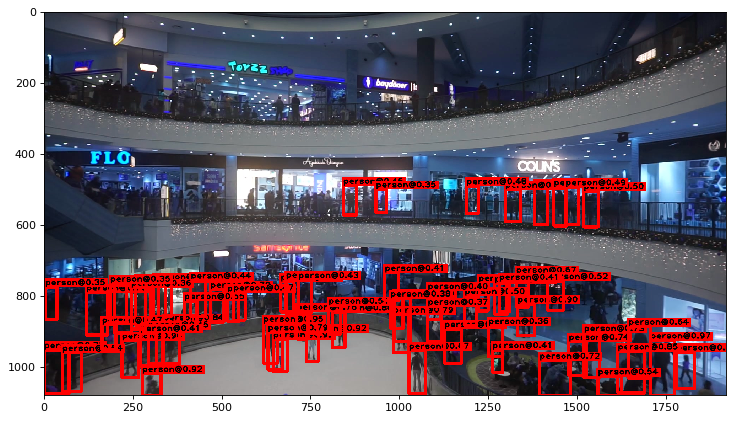

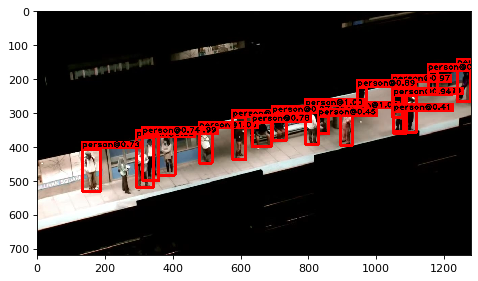

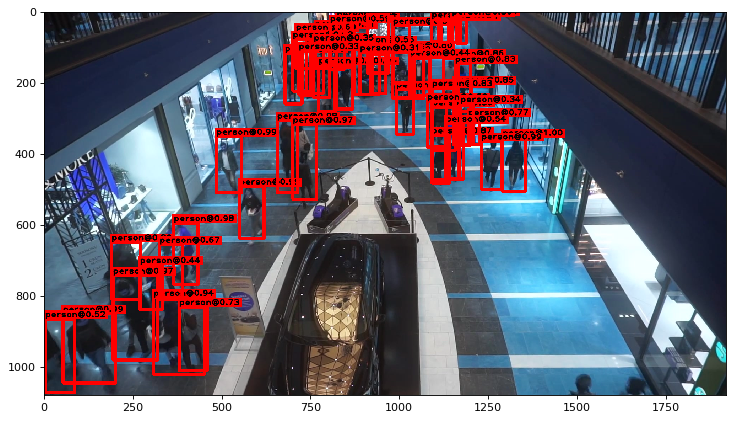

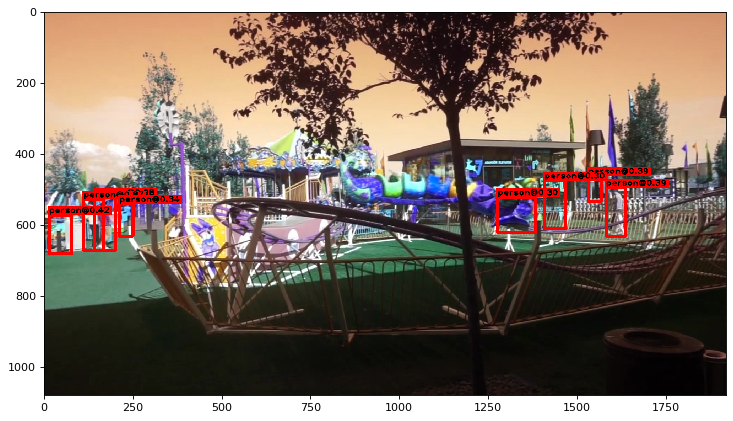

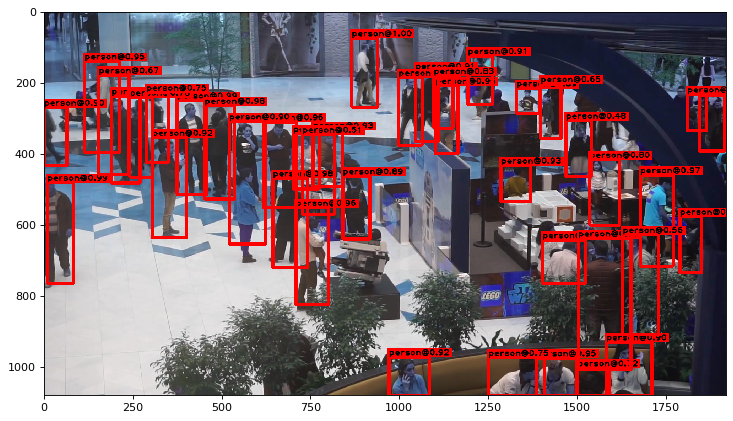

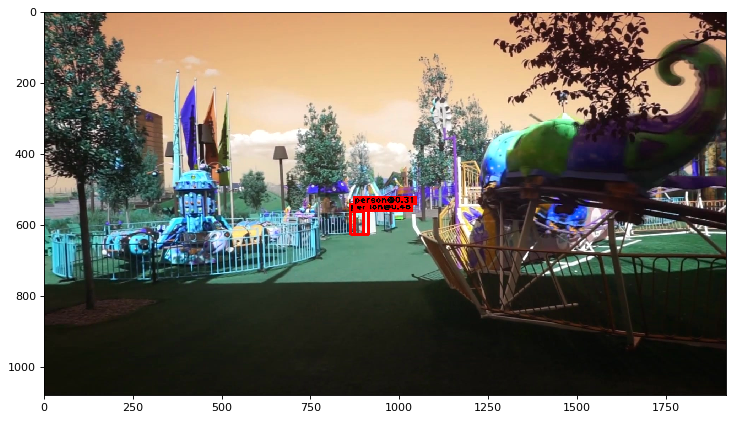

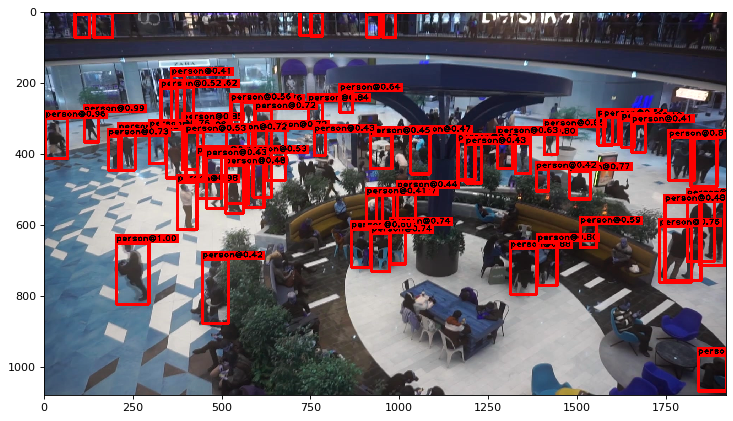

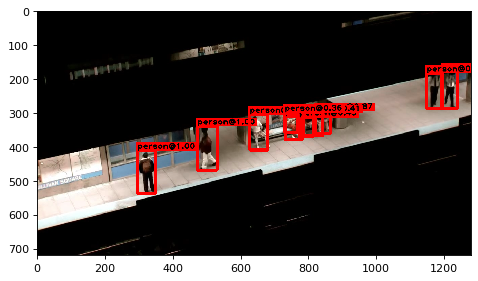

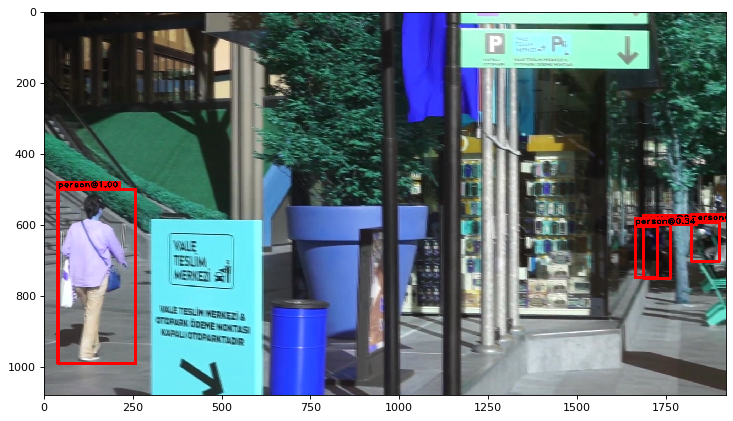

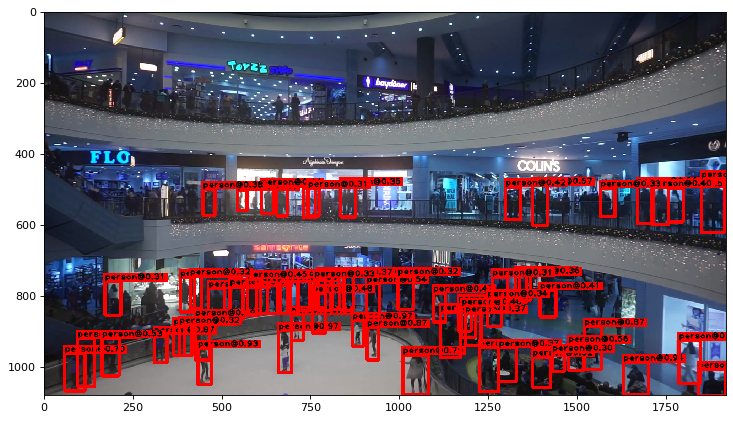

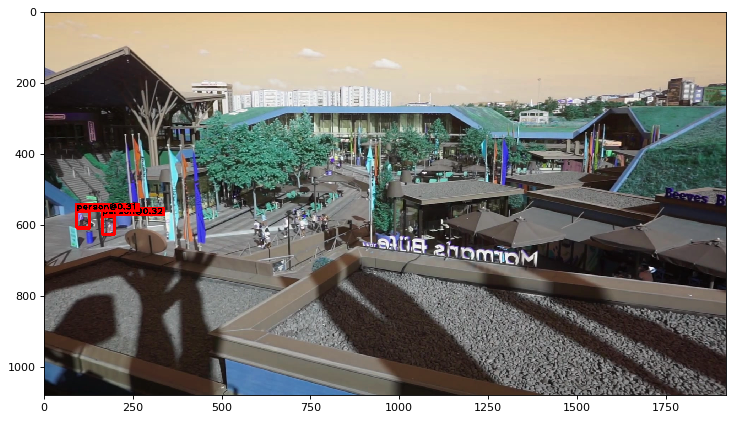

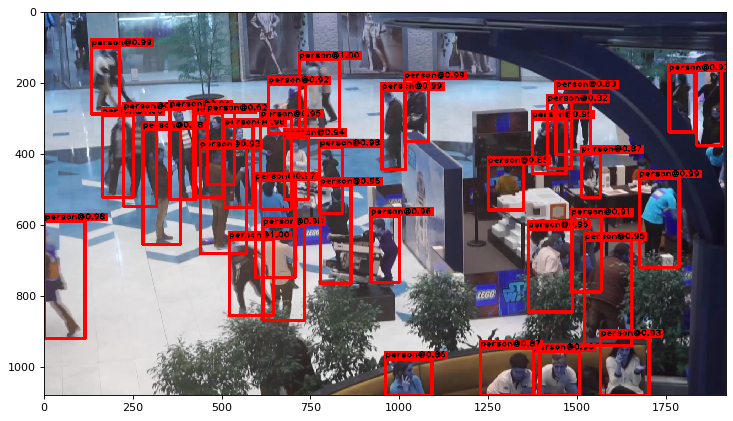

In [5]:
import os
import glob
import json
import boto3
import sagemaker
import cv2

# for displaying images at jupyter notebooks
from matplotlib import pyplot as plt

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)

def drawBB(
    image, header, x, y, xmax, ymax, color=(255, 0, 0), thickness=4*2, text_thickness=1*2,
    text_size=0.8*2, font=cv2.FONT_HERSHEY_PLAIN, footer=""
):
    # bounding box
    cv2.rectangle(image, (x, y), (xmax, ymax), color, thickness)
    
    # header text
    if header != '':
        (text_width, text_height) = cv2.getTextSize(header, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            (max(0, int(x-(thickness/2))), max(0, int(y-5-text_height-(thickness/2)))),
            (int(x+text_width+(thickness/2)), int(y)),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, header, (max(0, x), max(0, y-5)), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)
        
    if footer != "":
        (footer_width, footer_height) = cv2.getTextSize(footer, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            ( int(x-(thickness/2)), int(ymax+(thickness/2)) ),
            ( int(x+footer_width+(thickness/2)), int(ymax+footer_height+(thickness/2)) ),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, footer, ( x, int(ymax+12+(thickness/2)) ), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)

# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))
    
    # parse response to json
    response = json.loads(result['Body'].read().decode())
    img = cv2.imread(fpath, 1)
    (height, width, channels) = img.shape
    
    try:
        for det in response['input.jpg']['detections']:
            xmin = det['det_bbox'][0] * width
            ymin = det['det_bbox'][1] * height
            xmax = det['det_bbox'][2] * width
            ymax = det['det_bbox'][3] * height
            
            drawBB(img, '{}@{:.2f}'.format(det['label'], det['confidence']), int(xmin), int(ymin), int(xmax), int(ymax))
    # skip when there's no detections
    except:
        pass
    
    # show image in jupyter
    fig, ax = plt.subplots(figsize=(int(1.05 * height / 100), int(1.05 * width / 100)), dpi=80)
    ax.imshow(img, interpolation='nearest')
    plt.show()
    plt.close()
    
    # ..or just save to disk
    # cv2.imwrite('/path/to/output.jpg', img)
    